# <center>Forecasting income per person</center>
## <center>EDA and Training Model</center>
## Authors:
### >>> Alex Samoylenko
### >>> Vladyslav Honcharuk
### >>> Ostap Kalapun'
### >>> Maksym Chernykh

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

The main goal of our project is to create a model for predicting the total revenue per user on the thirtieth day of his life using various machine learning algorithms. Throughout the project, we did 3 main tasks: explored the dataset to get familiar with it, showed some general and statistical data and plotted some graphs, prepared the data by imputing missing values, removed  redundant features and discarded outliers, built a correlation heatmap for identifying properties that are most correlated with the target property. Finally, we tried different algorithms with different number of variables to find the best one in the training set and then used this model to predict user revenue based on the test

[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [27]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-ds/TEST TASK (dataset).csv


In [28]:
# in case of removing errors
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
pd.set_option('display.max_rows', 20)

In [30]:
df = pd.read_csv('../input/game-ds/TEST TASK (dataset).csv')

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting.



Include a description of the results displayed by each *plot*.

In [31]:
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sessions_day0,1466467.0,1.847298,2.530825,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day1,1466465.0,2.193912,3.621980,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day3,1466464.0,2.608979,5.347342,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day7,1466458.0,3.113484,7.888102,0.000000,1.0,1.0,2.0,905.000000
chapters_finished_day0,1467832.0,1.234763,3.048333,0.000000,0.0,0.0,1.0,73.000000
...,...,...,...,...,...,...,...,...
ad_ltv_day3,1467832.0,0.013254,0.074721,0.000000,0.0,0.0,0.0,19.970615
target_sub_ltv_day30,1467832.0,0.022030,0.308876,-2.829604,0.0,0.0,0.0,45.457412
target_iap_ltv_day30,1467832.0,0.213927,2.097916,0.000000,0.0,0.0,0.0,268.787759
target_ad_ltv_day30,1467832.0,0.020916,0.160193,0.000000,0.0,0.0,0.0,33.930838


Text(0.5, 1.0, 'Distribution of target_full_ltv_day30')

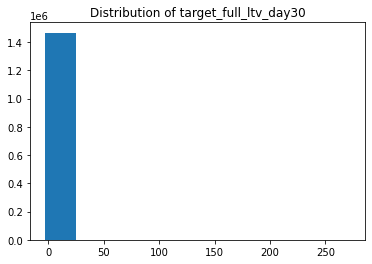

In [34]:
plt.hist(df["target_full_ltv_day30"])
plt.title("Distribution of target_full_ltv_day30")

#### Duplicate rows

In [35]:
duplicate_rows = df[df.duplicated()]
print("Number of all rows: ", df.shape[0])
print("Number of duplicate rows : ", duplicate_rows.shape[0])
print("Number of non-duplicate rows: ", df.shape[0] - duplicate_rows.shape[0])

Number of all rows:  1467832
Number of duplicate rows :  840221
Number of non-duplicate rows:  627611


[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


#### Missing values

In [36]:
missing_values = df.isna().sum()[df.isna().sum() > 0]
missing_values

total_sessions_day0    1365
total_sessions_day1    1367
total_sessions_day3    1368
total_sessions_day7    1374
dtype: int64

In [37]:
print(f"Number of missing values: {missing_values.sum()}")

Number of missing values: 5474


In [38]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Categorical data prep

In [39]:
categorical = df.select_dtypes(include='O').keys()
categorical

Index(['media_source', 'install_date', 'country_code', 'platform'], dtype='object')

In [40]:
platform_cat = pd.get_dummies(df.platform)
df.drop(['platform'], axis=1, inplace=True)
df = pd.concat([df, platform_cat], axis=1)

In [41]:
target_variable = "target_full_ltv_day30"
components_target = ['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30']
df_with_add = df.copy()

In [42]:
df.drop(['install_date', 'media_source', 'country_code', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30'], axis=1, inplace=True)

### Scaling

#### Normalization

In [43]:
from sklearn.preprocessing import StandardScaler

cols = df.columns
cols_norm = cols[cols!=('ios' or 'android' or 'target_full_ltv_day30')]
df[cols_norm] = StandardScaler().fit_transform(df[cols_norm])

### Data Split

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size=0.3)

train.to_csv("train.csv")
test.to_csv("test.csv")

In [45]:
X_train = train.drop('target_full_ltv_day30', axis=1)
y_train = train.target_full_ltv_day30
X_test = test.drop('target_full_ltv_day30', axis=1)
y_test = test.target_full_ltv_day30

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

Text(0.5, 1.0, 'Pearson Correlation')

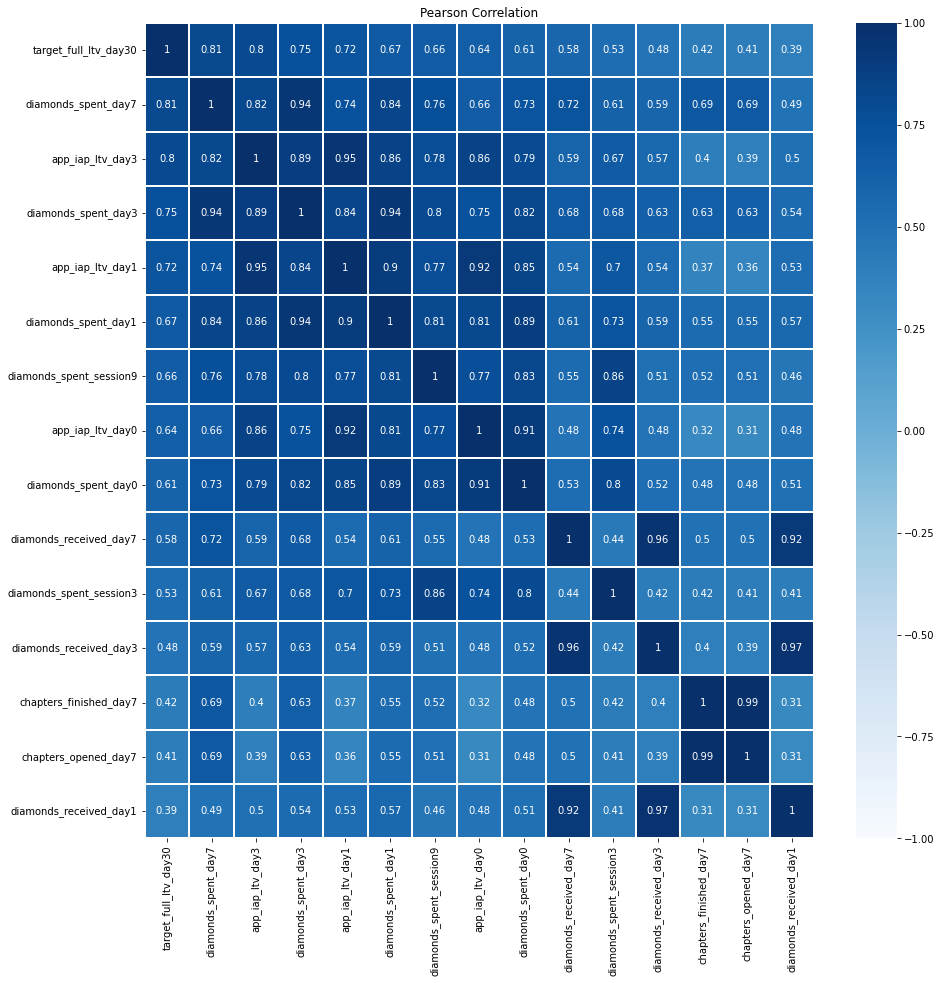

In [57]:
df_comp = df_with_add.drop(components_target, axis=1)
corr = df_comp.corr()
cols = corr[target_variable].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True,linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

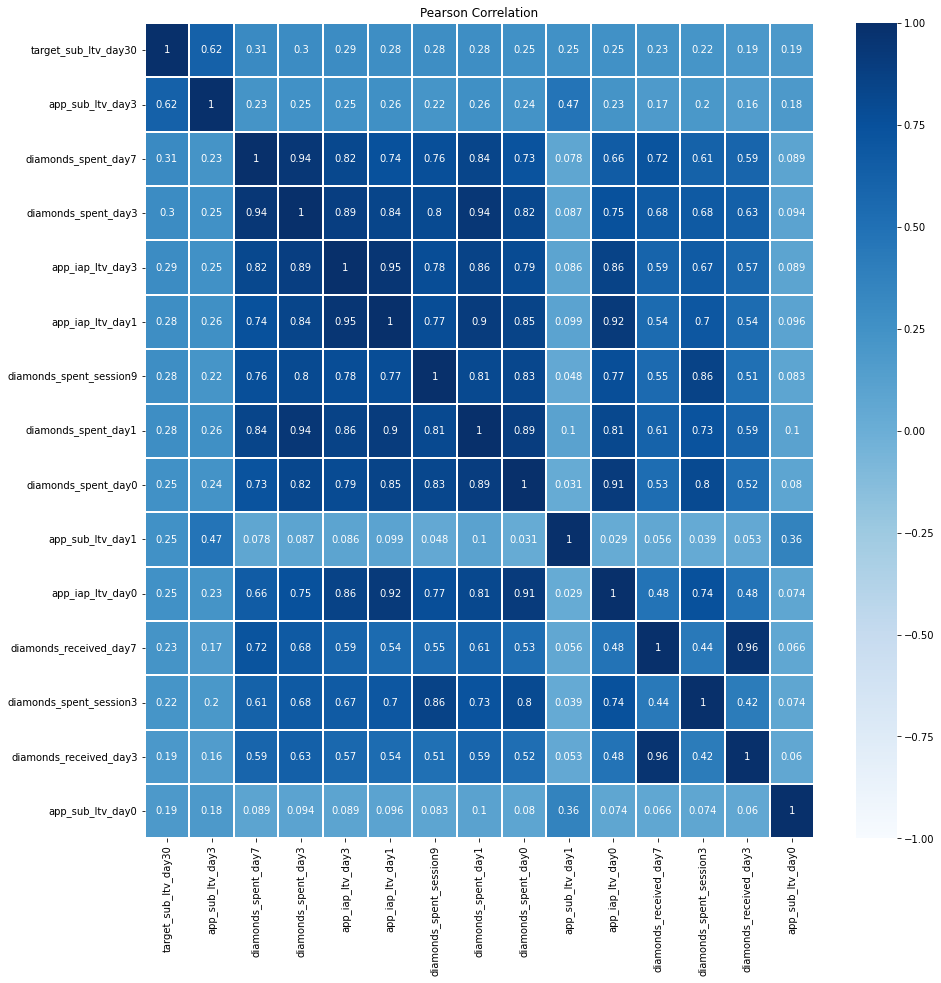

In [47]:
df_comp = df_with_add.drop([*components_target[1:], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[0]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

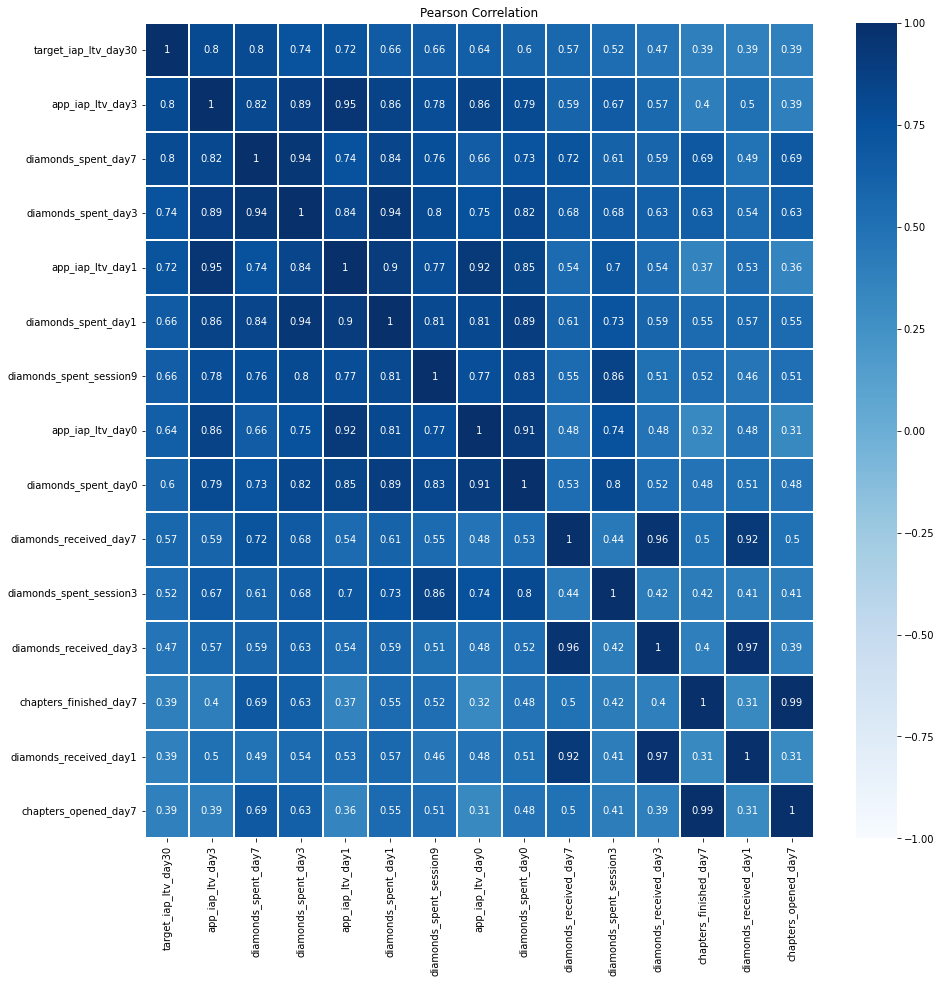

In [48]:
df_comp = df_with_add.drop([components_target[0], components_target[2], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[1]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

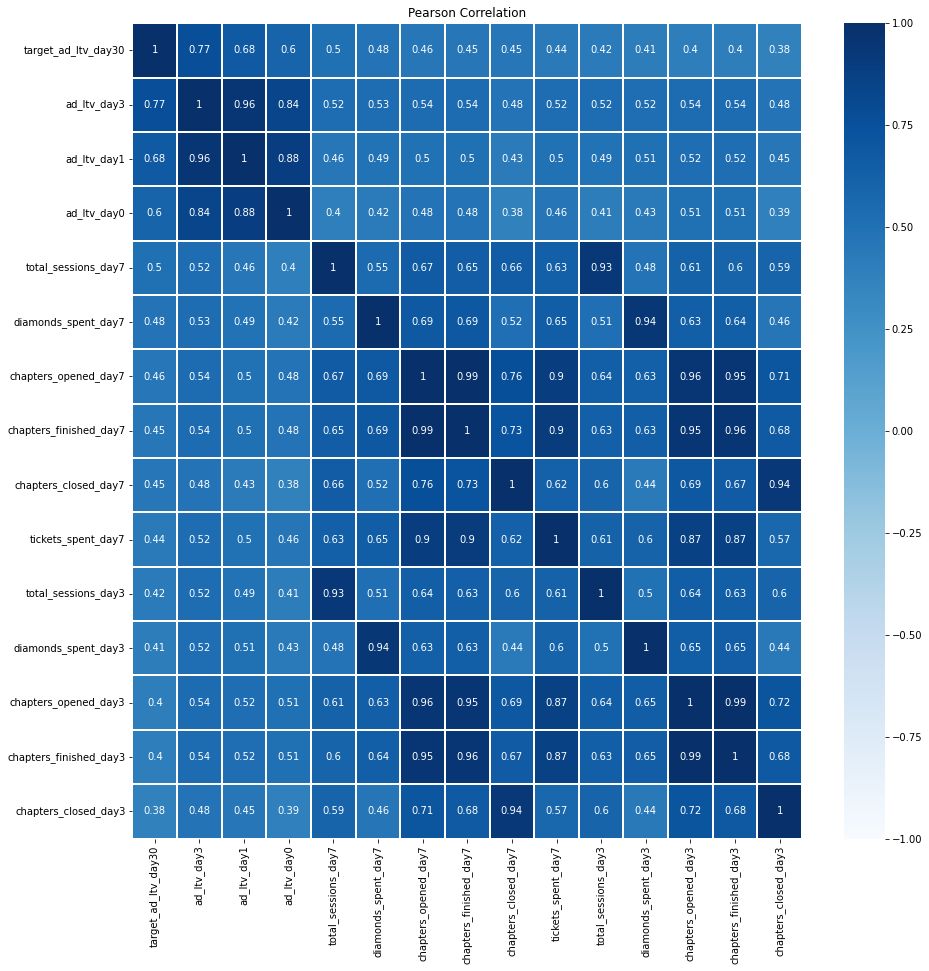

In [49]:
df_comp = df_with_add.drop([components_target[0], components_target[1], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[2]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")


[Back to top](#Index)

## 3. Project Description

Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Algorithm

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about it
Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



In [50]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
1124539/1467831

0.7661229392212047

In [51]:
model_lgb = LGBMRegressor(n_estimators=2000, learning_rate=0.05)
model_lgb.fit(X_train,
          y_train,
          early_stopping_rounds=10,
          eval_set=[(X_test, y_test)],
          verbose=False)

LGBMRegressor(learning_rate=0.05, n_estimators=2000)

In [52]:
predictions = model_lgb.predict(X_test)
score_mae = mean_absolute_error(y_test, predictions)
score_mape = mean_absolute_percentage_error(y_test, predictions)
score_rmse = mean_squared_error(y_test, predictions, squared=False)
score_r2 = r2_score(y_test, predictions)
print("LightGBM")
print("MAE score:", score_mae)
print("MAPE score:", score_mape)
print("RMSE score:", score_rmse)
print("R2 score:", score_r2)

LightGBM
MAE score: 0.03697959713468389
MAPE score: 0.3130356240751357
RMSE score: 0.47713279368914185
R2 score: 0.7858619502835887


In [53]:
import lime
import lime.lime_tabular

In [54]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                   verbose=True, mode='regression')

In [55]:
exp = explainer.explain_instance(X_test.values[10], model_lgb.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Intercept 3.7185940968556195
Prediction_local [1.27208407]
Right: -0.07639606723825029


In [58]:
#model = LinearRegression()
model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.2)
model_xgb.fit(X_train,
          y_train,
          early_stopping_rounds=5,
          eval_set=[(X_test, y_test)],
          verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
predictions = model_xgb.predict(X_test)
score_mae = mean_absolute_error(y_test, predictions)
score_mape = mean_absolute_percentage_error(y_test, predictions)
score_rmse = mean_squared_error(y_test, predictions, squared=False)
score_r2 = r2_score(y_test, predictions)
print("XGBoost")
print("MAE score:", score_mae)
print("MAPE score:", score_mape)
print("RMSE score:", score_rmse)
print("R2 score:", score_r2)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['variable'] = X_train.columns
feature_importance['importance'] = model_xgb.feature_importances_

feature_importance.sort_values(by='importance', ascending=False).head(20)

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

### 3.2 Analysis 


Try to improve the results of your model analysis by including a different number of variables in your code for algorithm. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?




[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .
